<a href="https://colab.research.google.com/github/Poohi5/cmpe257/blob/master/DT_AirQualityAndWeatherData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


###Set paths to get csv files

In [0]:
airQualityFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

####Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline



from dateutil.parser import parse 
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 120})

###Setup dataframes for air quality and weather data

In [0]:
df_air_quality = pd.read_csv(airQualityFilePath,date_parser=parse,
                    parse_dates=['Date'])
df_weather = pd.read_csv(weatherFilePath,date_parser=parse,
                    parse_dates=['date'])

In [5]:
df_air_quality.head(3)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,2016-01-01,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,2016-01-02,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25
2,2016-01-03,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28


In [6]:
df_weather.head(3)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9
2,2016-01-03,9.6,3.9,20.0,0.0,NaN,NaN,NaN,11.5,NaN,NaN,1011.5


In [0]:
df_air_quality.columns = map(str.lower, df_air_quality.columns)
df_air_quality.columns


df_air_quality['date'] = pd.to_datetime(df_air_quality['date']).dt.strftime('%m/%d/%Y')
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.strftime('%m/%d/%Y')

In [0]:
df = pd.merge(df_air_quality, df_weather, on='date', how='inner')

#####Rename longcolumn names for simplicity

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [10]:
df.head(5)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,NaN,NaN,NaN,11.5,NaN,NaN,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,NaN,NaN,NaN,NaN,7.2,NaN,NaN,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,NaN,NaN,NaN,7.6,NaN,NaN,1008.2


In [11]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
snowfall           float64
snowdepth          float64
winddirection      float64
windspeed          float64
peakgust           float64
sunshine           float64
pressure           float64
dtype: object

In [12]:
df.columns[df.isna().any()].tolist()

['precipitation',
 'snowfall',
 'snowdepth',
 'winddirection',
 'peakgust',
 'sunshine',
 'pressure']

####Replace dots in columns with 0's

In [13]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,0.0,0.0,0.0,6.5,0.0,0.0,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,0.0,0.0,0.0,3.6,0.0,0.0,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,0.0,0.0,0.0,11.5,0.0,0.0,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,0.0,0.0,0.0,7.2,0.0,0.0,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,0.0,0.0,0.0,7.6,0.0,0.0,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,0.0,0.0,0.0,3.2,0.0,0.0,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,0.0,0.0,0.0,2.9,0.0,0.0,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,0.0,0.0,0.0,7.9,0.0,0.0,1018.4


In [14]:
df.columns[df.isna().any()].tolist()

[]

###Convert object to float datatype

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(int)

arr = ['co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [16]:
df.head()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,0.0,0.0,0.0,6.5,0.0,0.0,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,0.0,0.0,0.0,3.6,0.0,0.0,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,0.0,0.0,0.0,11.5,0.0,0.0,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,0.0,0.0,0.0,7.2,0.0,0.0,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,0.0,0.0,0.0,7.6,0.0,0.0,1008.2


In [17]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                   int64
ozone                int64
pm10                 int64
pm25                 int64
no2                  int64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
snowfall           float64
snowdepth          float64
winddirection      float64
windspeed          float64
peakgust           float64
sunshine           float64
pressure           float64
dtype: object

In [0]:
df = df.set_index('date')


####EDA using some plots

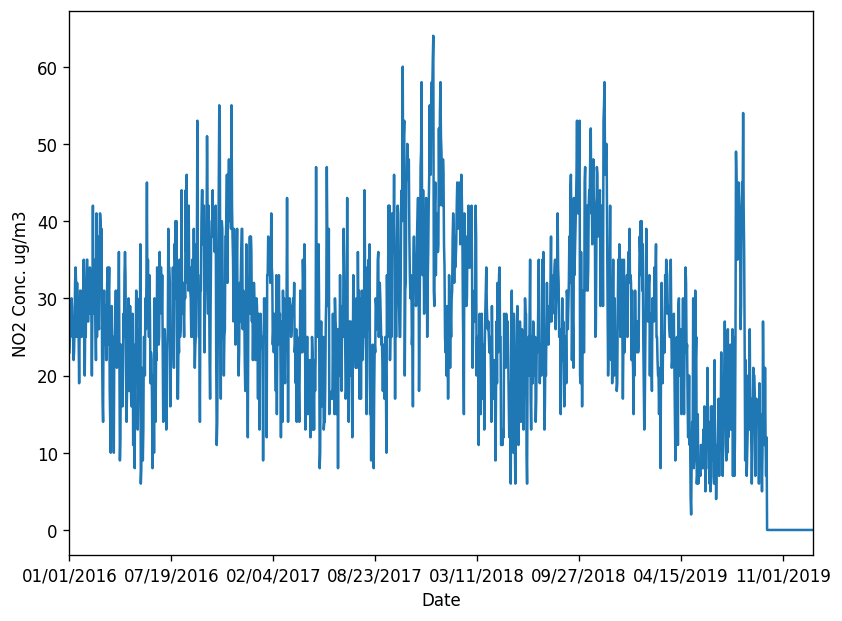

In [19]:
df['no2'].plot()
plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Date')
plt.show()

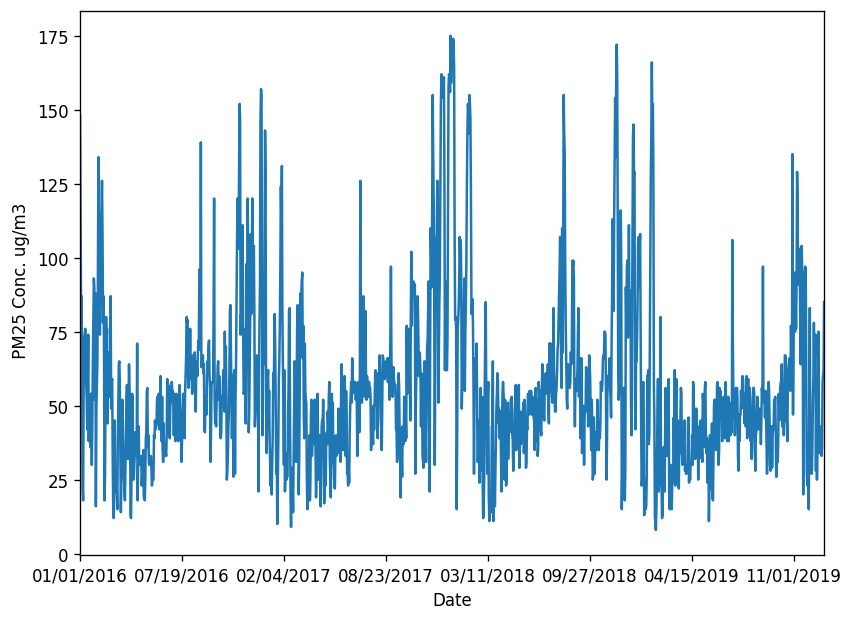

In [20]:
df['pm25'].plot()
plt.ylabel(' PM25 Conc. ug/m3')
plt.xlabel('Date')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


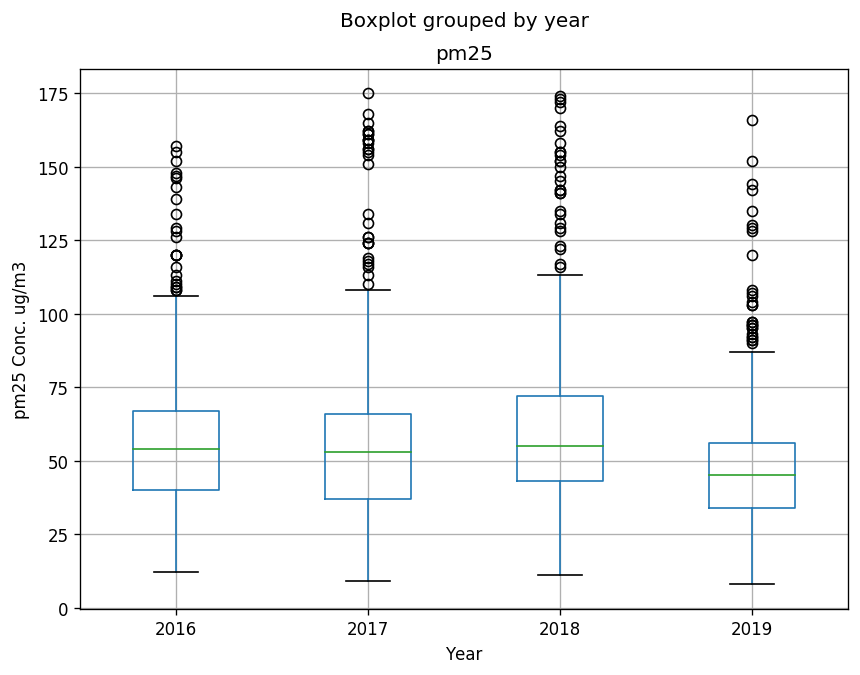

In [21]:
new_df = df[['pm25']]
new_df['year'] = pd.DatetimeIndex(new_df.index).year
new_df.boxplot(by='year')
plt.ylabel('pm25 Conc. ug/m3')
plt.xlabel('Year')

plt.show()

In [22]:
df.head(5)

,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
date,,,,,,,,,,,,,,,,,,,,,
01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,0.0,0.0,0.0,6.5,0.0,0.0,1020.3
01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,0.0,0.0,0.0,3.6,0.0,0.0,1017.9
01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,0.0,0.0,0.0,11.5,0.0,0.0,1011.5
01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,0.0,0.0,0.0,7.2,0.0,0.0,1008.8
01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,0.0,0.0,0.0,7.6,0.0,0.0,1008.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


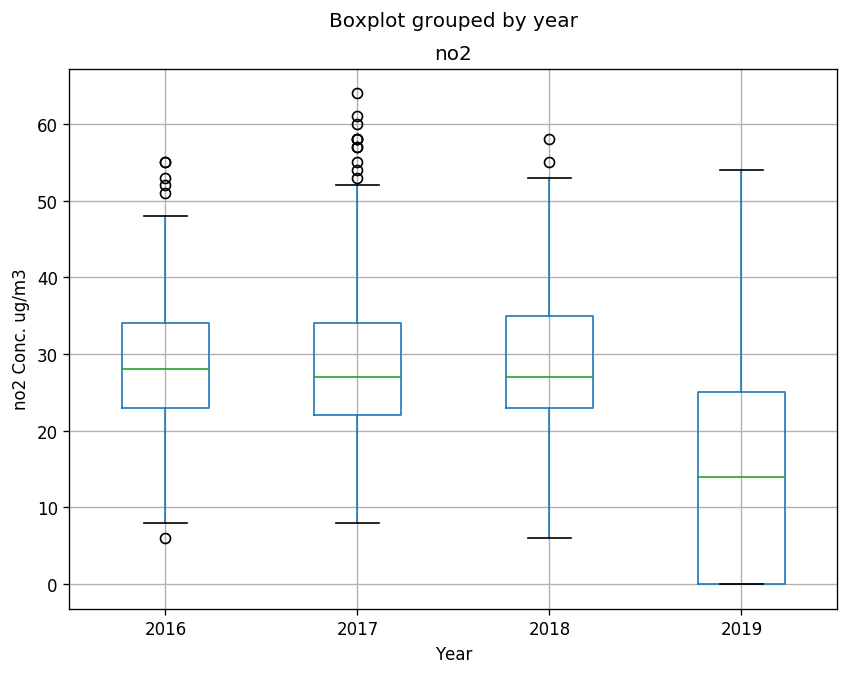

In [23]:
new_df = df[['no2']]
new_df['year'] = pd.DatetimeIndex(new_df.index).year
new_df.boxplot(by='year')
plt.ylabel('no2 Conc. ug/m3')
plt.xlabel('Year')

plt.show()

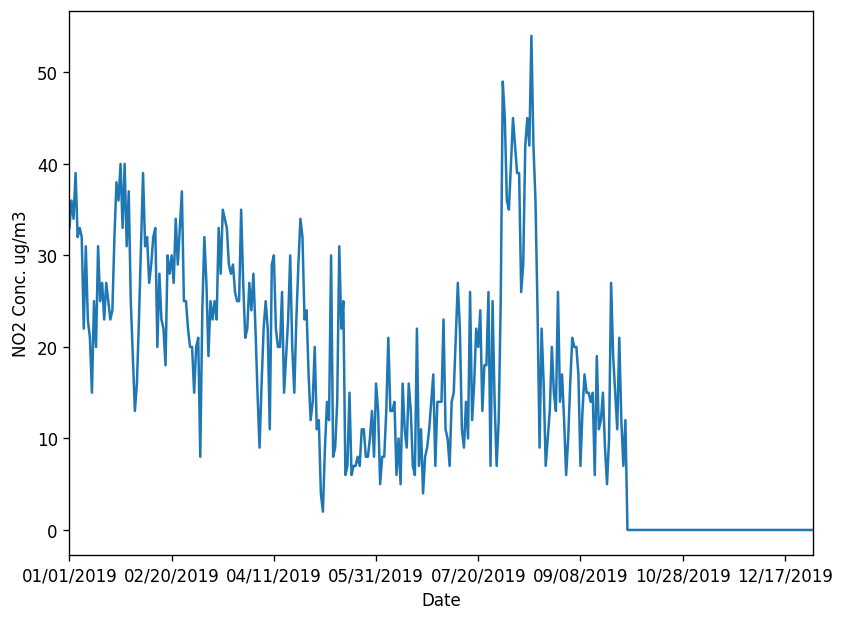

In [24]:
df['01/01/2019':'12/31/2019']['no2'].plot()
plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Date')
plt.show()

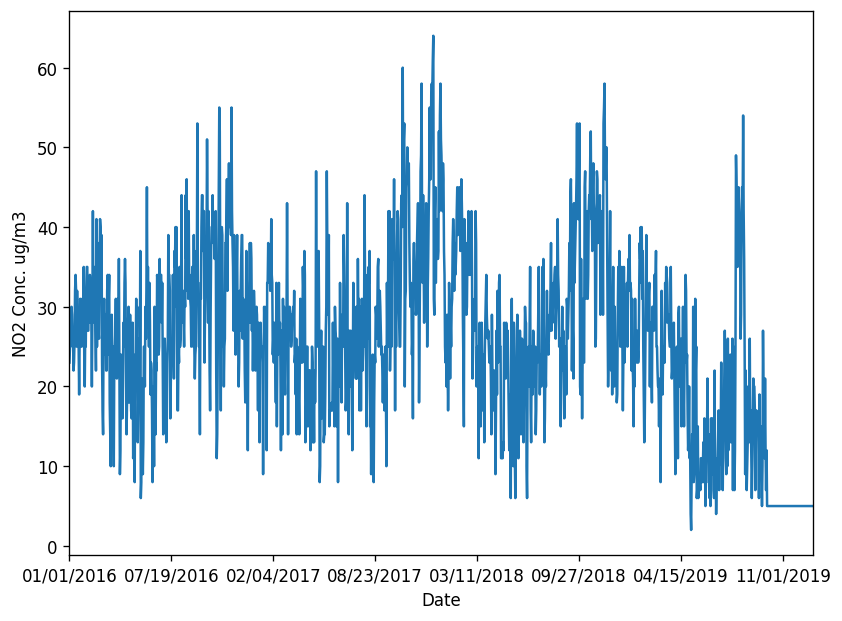

In [25]:
df["no2"] = df["no2"].apply(lambda x: 5 if x <= 0 else x)

# Plot the result
df['no2'].plot()
plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Date')
plt.show()

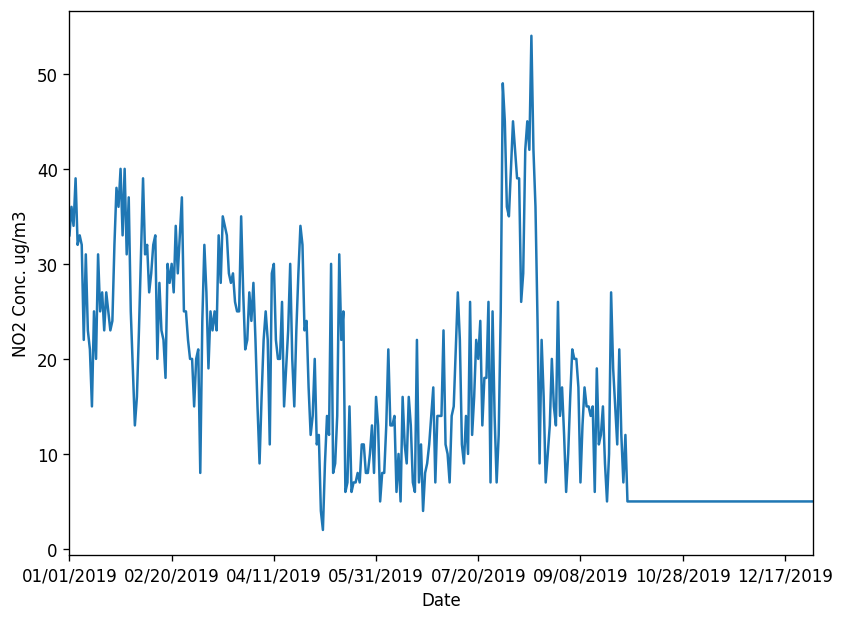

In [26]:
df['01/01/2019':'12/31/2019']['no2'].plot()
plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Date')
plt.show()

In [27]:
df.head()

,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
date,,,,,,,,,,,,,,,,,,,,,
01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,0.0,0.0,0.0,6.5,0.0,0.0,1020.3
01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,0.0,0.0,0.0,3.6,0.0,0.0,1017.9
01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,0.0,0.0,0.0,11.5,0.0,0.0,1011.5
01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,0.0,0.0,0.0,7.2,0.0,0.0,1008.8
01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,0.0,0.0,0.0,7.6,0.0,0.0,1008.2


###some more insights for pm25

In [0]:
# Selecting only the parameters we want.
weather_sub_df = df[['temperature_max','windspeed','winddirection','pressure','sunshine']]


In [29]:
# Create a data frame only containing PM25 data and merge it with  new weather data frame
pm25_df = df[['pm25']]
comp_df = pd.merge(weather_sub_df,pm25_df, left_index=True, right_index=True)
comp_df.head()

,temperature_max,windspeed,winddirection,pressure,sunshine,pm25
date,,,,,,
01/01/2016,12.8,6.5,0.0,1020.3,0.0,148
01/02/2016,13.9,3.6,0.0,1017.9,0.0,113
01/03/2016,20.0,11.5,0.0,1011.5,0.0,80
01/04/2016,18.3,7.2,0.0,1008.8,0.0,87
01/05/2016,14.4,7.6,0.0,1008.2,0.0,54


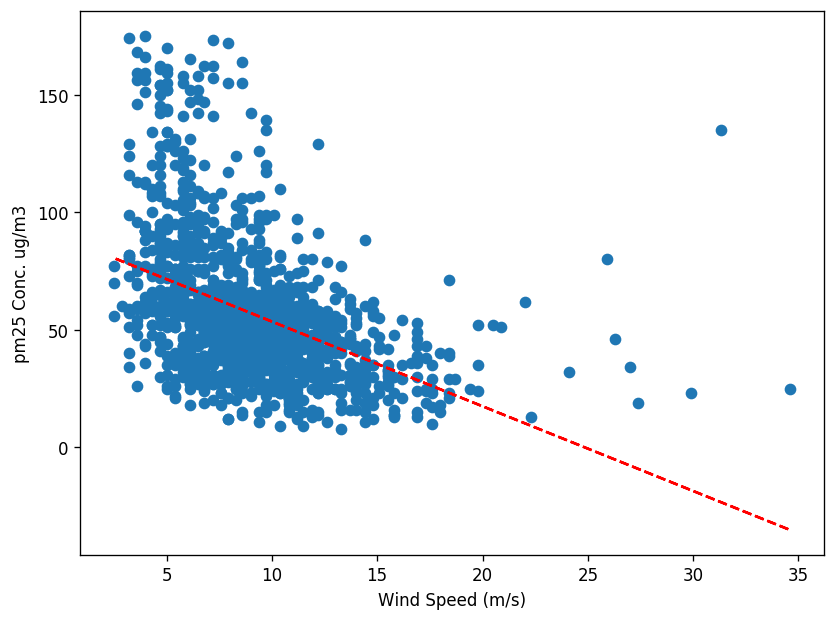

In [30]:
mydata = comp_df[['windspeed','pm25']]

x = mydata['windspeed']
y = mydata['pm25']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('pm25 Conc. ug/m3')
plt.xlabel('Wind Speed (m/s)')
plt.show()

plt.show()

**Figure:** Wind speed versus  PM25 concentration. As wind speed increases pollution concentration decreases.

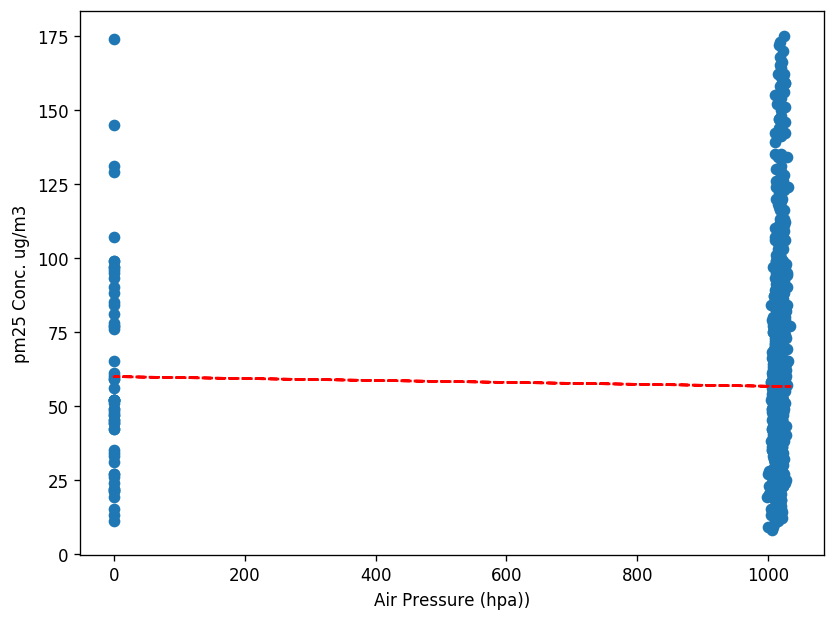

In [31]:
mydata1 = comp_df[['pressure','pm25']]

x = mydata1['pressure']
y = mydata1['pm25']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('pm25 Conc. ug/m3')
plt.xlabel('Air Pressure (hpa))')
plt.show()

plt.show()

**Figure:** Air Pressure versus  PM25 concentration. 

In [32]:
# Selecting only the parameters we want.
weather_sub_df1 = df[['temperature_max','windspeed','winddirection','pressure','sunshine']]


# Create a data frame only containing NO2 data and merge it with new weather data frame
no2_df = df[['no2']]
comp_df_no2 = pd.merge(weather_sub_df,no2_df, left_index=True, right_index=True)
comp_df_no2.head()


,temperature_max,windspeed,winddirection,pressure,sunshine,no2
date,,,,,,
01/01/2016,12.8,6.5,0.0,1020.3,0.0,23
01/02/2016,13.9,3.6,0.0,1017.9,0.0,25
01/03/2016,20.0,11.5,0.0,1011.5,0.0,28
01/04/2016,18.3,7.2,0.0,1008.8,0.0,28
01/05/2016,14.4,7.6,0.0,1008.2,0.0,30


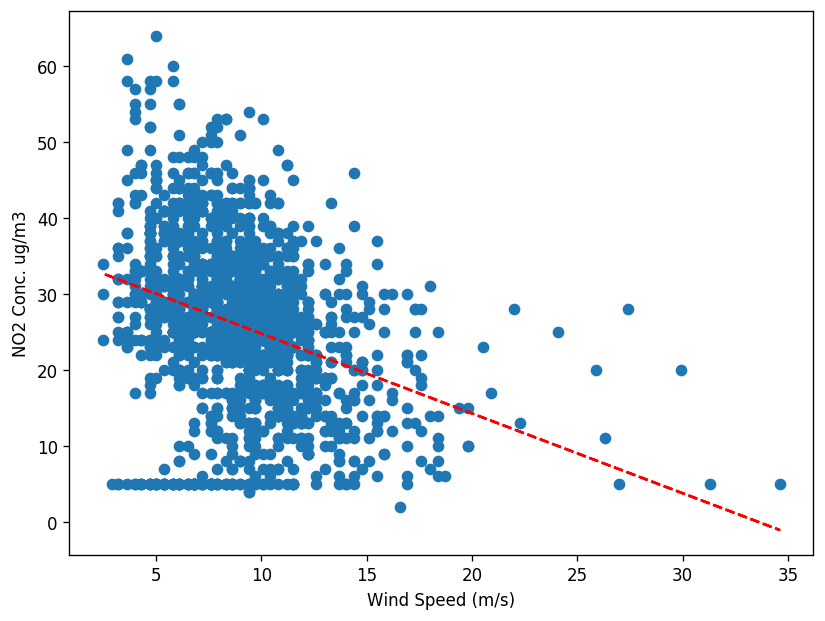

In [33]:
mydata_no2 = comp_df_no2[['windspeed','no2']]

x = mydata_no2['windspeed']
y = mydata_no2['no2']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Wind Speed (m/s)')
plt.show()

plt.show()

In [34]:
mydata_no2.head()

,windspeed,no2
date,,
01/01/2016,6.5,23
01/02/2016,3.6,25
01/03/2016,11.5,28
01/04/2016,7.2,28
01/05/2016,7.6,30


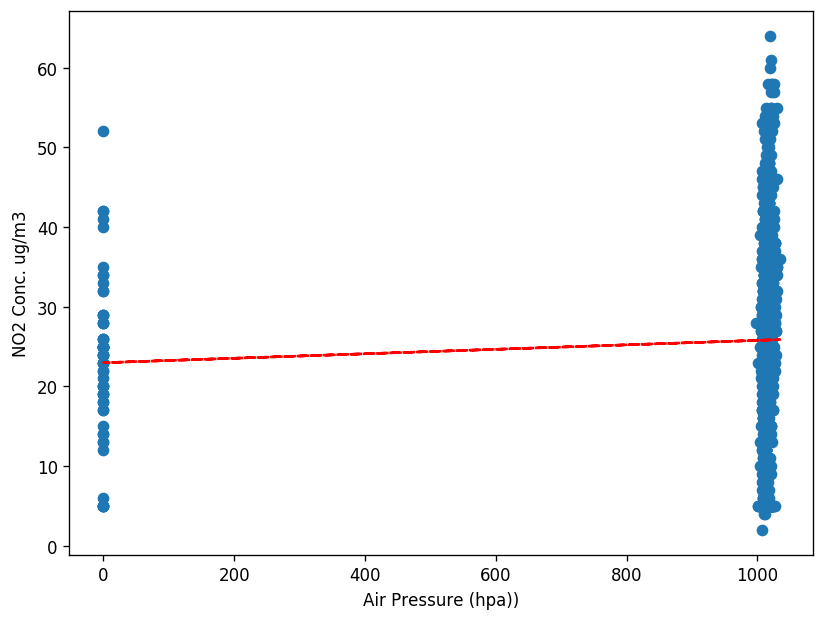

In [35]:
mydata_no2_1 = comp_df_no2[['pressure','no2']]

x = mydata_no2_1['pressure']
y = mydata_no2_1['no2']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('NO2 Conc. ug/m3')
plt.xlabel('Air Pressure (hpa))')
plt.show()

plt.show()

####Time Lag for No2

### Time lag

A characteristic of time series data, is the data may be strongly associated with a lagged copy of itself. This autoregression property of NO<sub>2</sub> concentrations was investigated by graphing a NO<sub>2</sub> data against a one day lag of itself, see following.

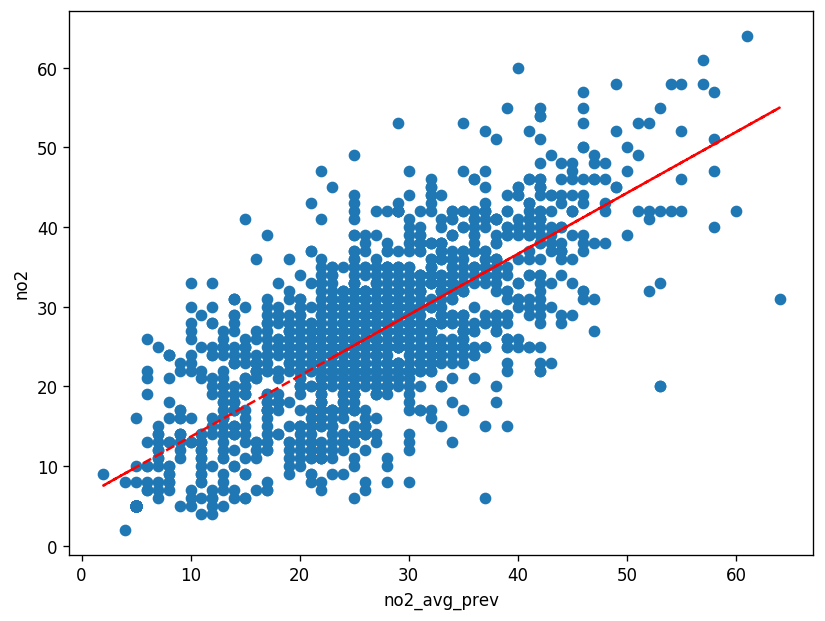

In [36]:
comp_df_no2['no2_avg_prev'] = comp_df_no2["no2"].shift(1)
mydata_no2 = comp_df_no2[['no2_avg_prev','no2']]
mydata_no2 = mydata_no2['01/02/2016':'12/31/2019']


x = mydata_no2['no2_avg_prev']
y = mydata_no2['no2']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('no2')
plt.xlabel('no2_avg_prev')
plt.show()

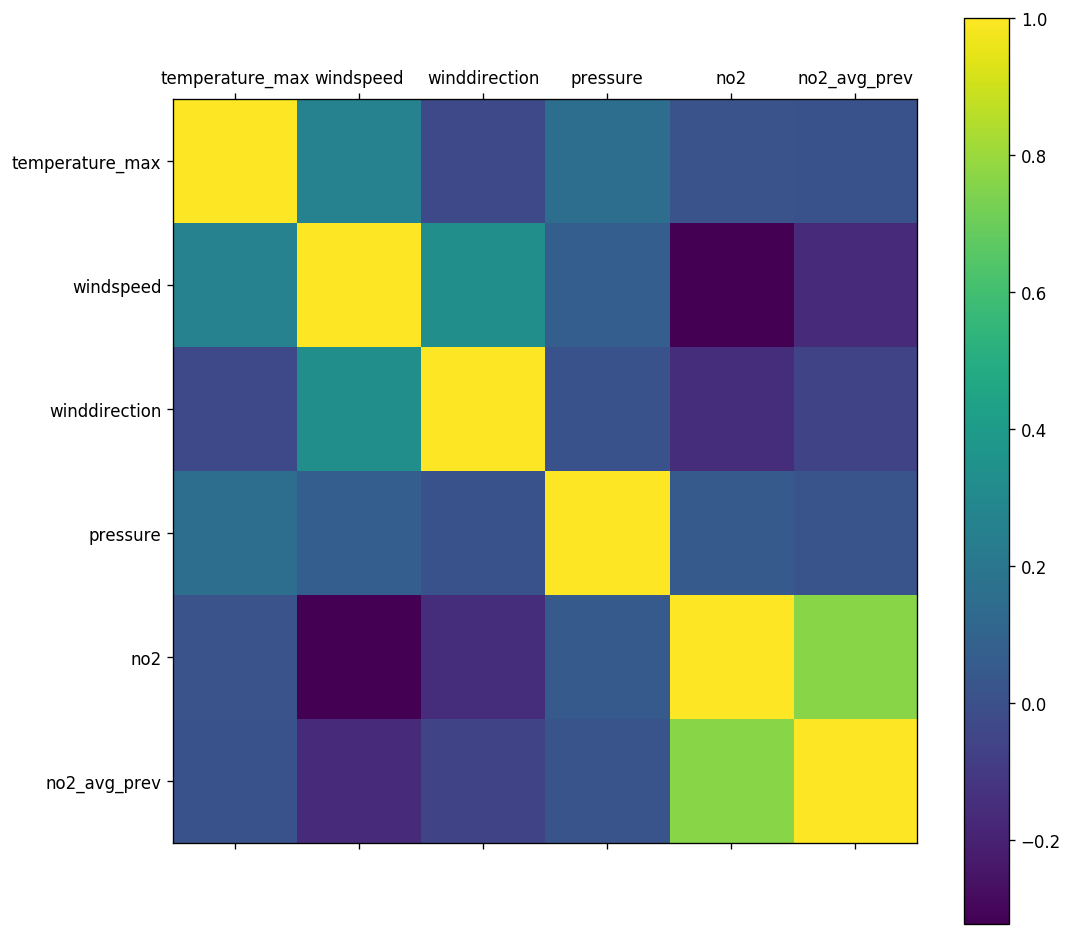

In [37]:

cor_cols = ['temperature_max', 'windspeed', 'winddirection','pressure','no2','no2_avg_prev']

fig = plt.figure(figsize=(10,10))
im = plt.matshow(comp_df_no2.loc[:, cor_cols].corr(), fignum=0)
fig.colorbar(im)
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.show()


***Figure*** No2 and NO2 on previous day are highly correlated (0.8)

Timelag for pm25

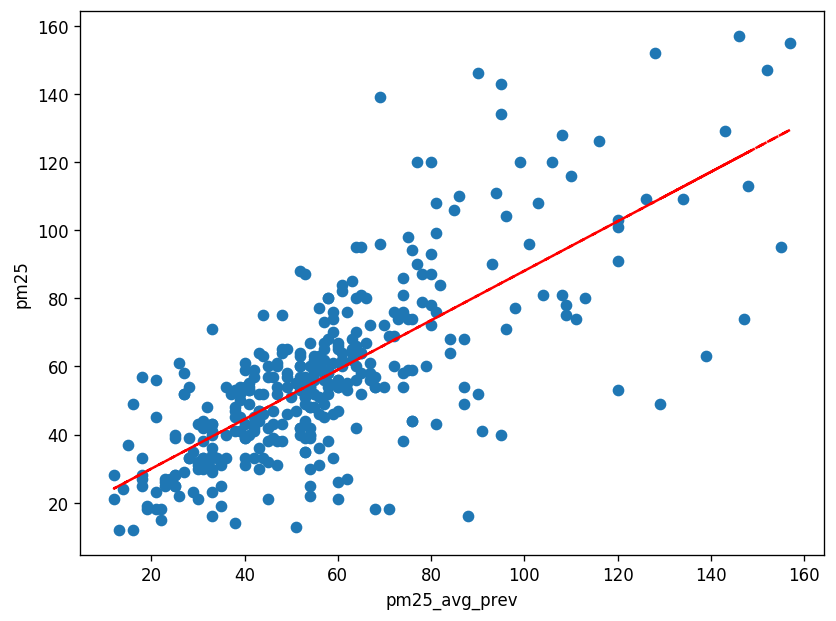

In [38]:
comp_df['pm25_avg_prev'] = comp_df["pm25"].shift(1)
mydata = comp_df[['pm25_avg_prev','pm25']]
mydata = mydata['01/02/2016':'12/31/2016']


x = mydata['pm25_avg_prev']
y = mydata['pm25']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.ylabel('pm25')
plt.xlabel('pm25_avg_prev')
plt.show()

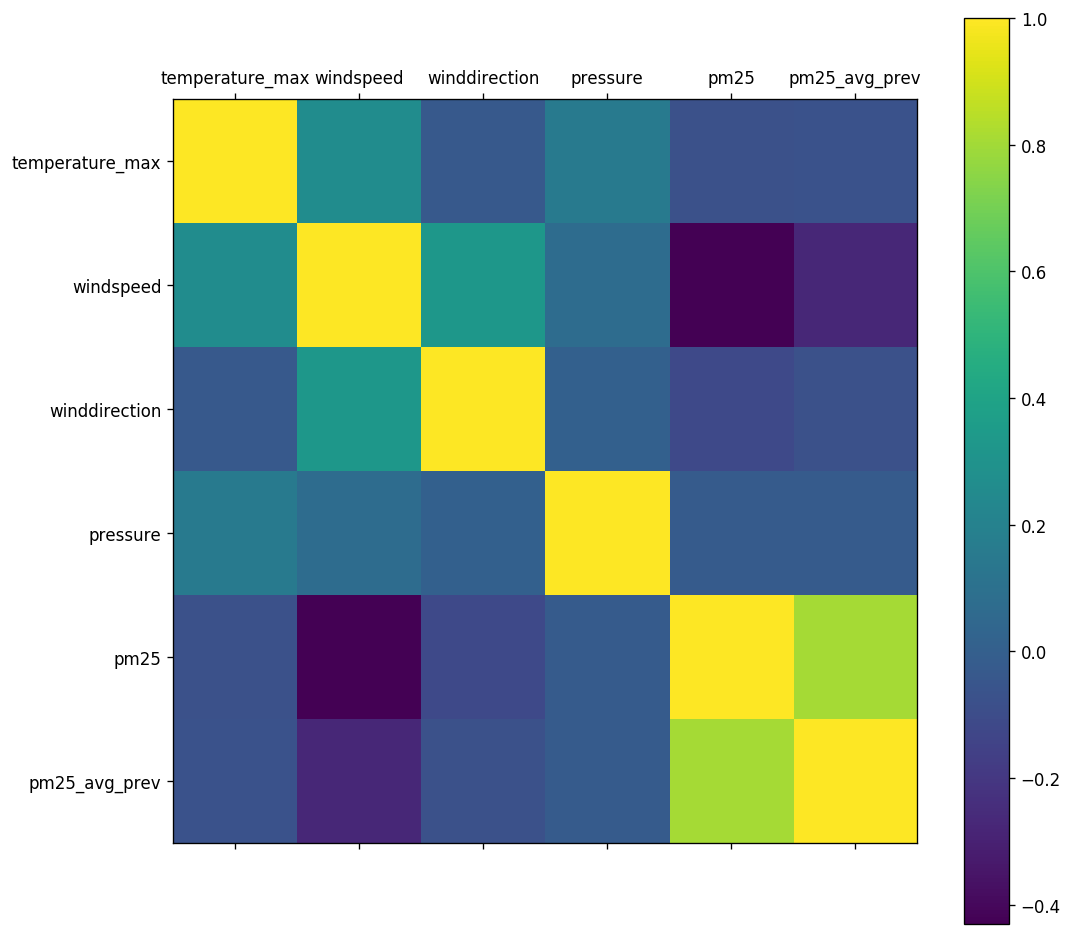

In [39]:
cor_cols = ['temperature_max', 'windspeed', 'winddirection','pressure','pm25','pm25_avg_prev']

fig = plt.figure(figsize=(10,10))
im = plt.matshow(comp_df.loc[:, cor_cols].corr(), fignum=0)
fig.colorbar(im)
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.show()


###Decision Tree

In [0]:
# Drop the 1st row as NaN
aq_df = comp_df.iloc[1:].copy()

# Adding wind_speed_direction, the product of wind_speed and the direction
aq_df["wind_speed_direction"] = aq_df.apply(lambda row: row['windspeed'] * float(row['winddirection']), axis=1)

In [41]:
aq_df.head()


,temperature_max,windspeed,winddirection,pressure,sunshine,pm25,pm25_avg_prev,wind_speed_direction
date,,,,,,,,
01/02/2016,13.9,3.6,0.0,1017.9,0.0,113,148.0,0.0
01/03/2016,20.0,11.5,0.0,1011.5,0.0,80,113.0,0.0
01/04/2016,18.3,7.2,0.0,1008.8,0.0,87,80.0,0.0
01/05/2016,14.4,7.6,0.0,1008.2,0.0,54,87.0,0.0
01/06/2016,15.0,11.2,0.0,0.0,0.0,22,54.0,0.0


In [42]:
aq_df.index

Index(['01/02/2016', '01/03/2016', '01/04/2016', '01/05/2016', '01/06/2016',
       '01/07/2016', '01/08/2016', '01/09/2016', '01/10/2016', '01/11/2016',
       ...
       '12/22/2019', '12/23/2019', '12/24/2019', '12/25/2019', '12/26/2019',
       '12/27/2019', '12/28/2019', '12/29/2019', '12/30/2019', '12/31/2019'],
      dtype='object', name='date', length=1460)

In [0]:
aq_df['chunks'] = range(0, len(aq_df.index.values))

In [44]:
aq_df.head(3)

,temperature_max,windspeed,winddirection,pressure,sunshine,pm25,pm25_avg_prev,wind_speed_direction,chunks
date,,,,,,,,,
01/02/2016,13.9,3.6,0.0,1017.9,0.0,113,148.0,0.0,0
01/03/2016,20.0,11.5,0.0,1011.5,0.0,80,113.0,0.0,1
01/04/2016,18.3,7.2,0.0,1008.8,0.0,87,80.0,0.0,2


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
aq_df_new = aq_df[['temperature_max', 
                   'windspeed', 'winddirection',
                   'pressure', 'sunshine', 
                   'pm25', 'pm25_avg_prev', 
                   'wind_speed_direction']]

In [47]:
scaler.fit(aq_df_new.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaler.mean_

array([ 26.7230137 ,   9.13164384,   7.30136986, 973.19376712,
         0.        ,  56.60410959,  56.64726027, 117.25253425])

In [0]:
aq_df_new = scaler.transform(aq_df_new)

In [0]:
aq_df_new = pd.DataFrame(data=aq_df_new, columns=['temperature_max', 
                   'windspeed', 'winddirection',
                   'pressure', 'sunshine', 
                   'pm25', 'pm25_avg_prev', 
                   'wind_speed_direction'])

In [51]:
aq_df_new.head()

,temperature_max,windspeed,winddirection,pressure,sunshine,pm25,pm25_avg_prev,wind_speed_direction
0,-1.483224,-1.590520,-0.165201,0.221833,0.0,1.943467,3.138504,-0.159782
1,-0.777644,0.680976,-0.165201,0.190076,0.0,0.806249,1.936048,-0.159782
2,-0.974281,-0.555408,-0.165201,0.176679,0.0,1.047477,0.802304,-0.159782
3,-1.425389,-0.440395,-0.165201,0.173701,0.0,-0.089741,1.042795,-0.159782
4,-1.355988,0.594717,-0.165201,-4.828999,0.0,-1.192497,-0.090949,-0.159782


In [52]:
aq_df.shape

(1460, 9)

In [53]:
aq_df.columns

Index(['temperature_max', 'windspeed', 'winddirection', 'pressure', 'sunshine',
       'pm25', 'pm25_avg_prev', 'wind_speed_direction', 'chunks'],
      dtype='object')

In [54]:
aq_df_new.shape

(1460, 8)

In [0]:
aq_df_new.index = aq_df.index

In [0]:
aq_df_new['chunks'] = aq_df['chunks']

In [57]:
aq_df_new.head()

,temperature_max,windspeed,winddirection,pressure,sunshine,pm25,pm25_avg_prev,wind_speed_direction,chunks
date,,,,,,,,,
01/02/2016,-1.483224,-1.590520,-0.165201,0.221833,0.0,1.943467,3.138504,-0.159782,0
01/03/2016,-0.777644,0.680976,-0.165201,0.190076,0.0,0.806249,1.936048,-0.159782,1
01/04/2016,-0.974281,-0.555408,-0.165201,0.176679,0.0,1.047477,0.802304,-0.159782,2
01/05/2016,-1.425389,-0.440395,-0.165201,0.173701,0.0,-0.089741,1.042795,-0.159782,3
01/06/2016,-1.355988,0.594717,-0.165201,-4.828999,0.0,-1.192497,-0.090949,-0.159782,4


In [58]:
predictors_list = ['temperature_max', 'windspeed', 'winddirection', 'pressure', 'sunshine',
       'pm25', 'wind_speed_direction']
X = aq_df_new[predictors_list]
X.tail()

,temperature_max,windspeed,winddirection,pressure,sunshine,pm25,wind_speed_direction
date,,,,,,,
12/27/2019,-1.737695,-1.475508,-0.165201,0.218856,0.0,-0.710041,-0.159782
12/28/2019,-1.552625,-1.705533,-0.165201,0.236223,0.0,0.048104,-0.159782
12/29/2019,-1.286587,-1.791792,-0.165201,0.229772,0.0,0.117026,-0.159782
12/30/2019,-1.483224,-0.354136,-0.165201,0.224314,0.0,0.185949,-0.159782
12/31/2019,-1.425389,-0.670420,-0.165201,-4.828999,0.0,0.978555,-0.159782


In [59]:
y_rgs = aq_df_new.pm25_avg_prev
y_rgs.tail()

date
12/27/2019   -0.812423
12/28/2019   -0.709355
12/29/2019    0.046475
12/30/2019    0.115186
12/31/2019    0.183898
Name: pm25_avg_prev, dtype: float64

####Train Test Split

In [60]:
train_length = int(len(aq_df_new)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(1021, 7) (1021,)
(439, 7) (439,)


In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)

In [62]:
dtr.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=200, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

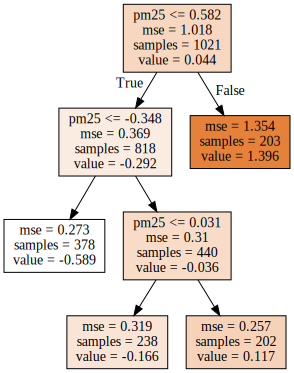

In [63]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr,
                  out_file=None,
                  filled=True,
                  feature_names=predictors_list)
graphviz.Source(dot_data)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = dtr.score(X_rgs_train,y_rgs_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction:",model_score)
y_predicted = dtr.predict(X_rgs_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_rgs_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_rgs_test, y_predicted))

coefficient of determination R^2 of the prediction: 0.5137587435840614
Mean squared error: 0.48
Test Variance score: 0.49


###Accuracy with Test Data

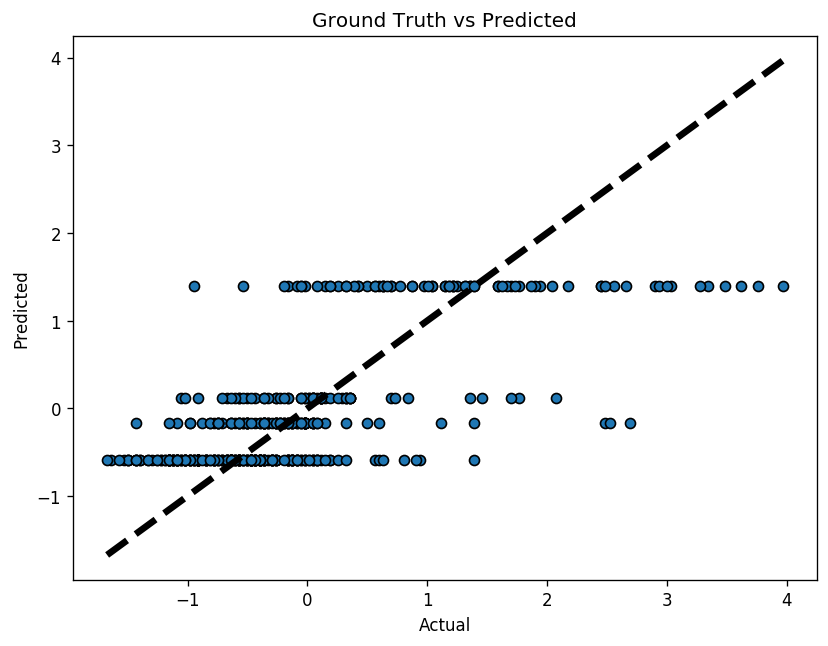

In [65]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_rgs_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_rgs_test.min(), y_rgs_test.max()], [y_rgs_test.min(), y_rgs_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()